In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Aditya\OneDrive\Desktop\Data_Science\telco-customer-churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [53]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Male      3555
Female    3488
Name: gender, dtype: int64


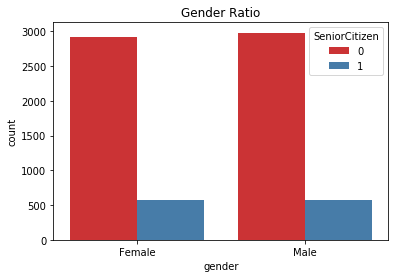

In [6]:
print(df.gender.value_counts())
plot=sns.countplot('gender',hue='SeniorCitizen',palette='Set1',data=df)
plt.title("Gender Ratio")
plt.show()

In [21]:
print(df[(df.PhoneService=='Yes')].MonthlyCharges.mean())
print(df[df.InternetService!='No'].MonthlyCharges.mean())

67.19904103128438
76.84425412361792


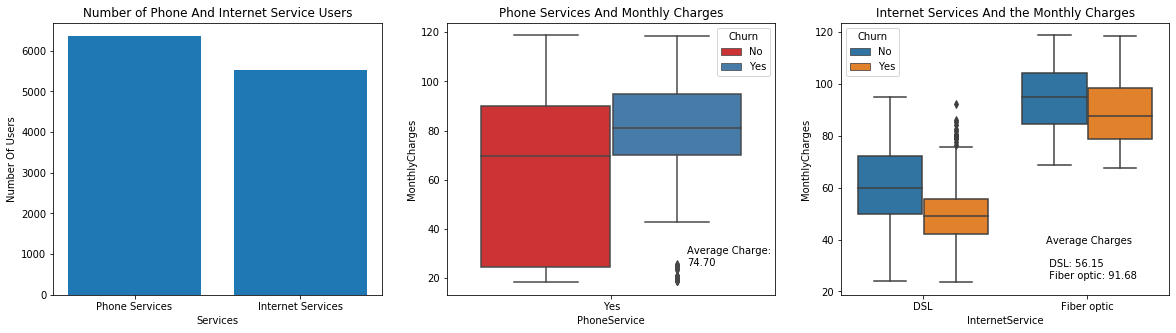

In [6]:
ph_c=df[df.PhoneService=='Yes'].PhoneService.count()
inet_c=df[df.InternetService!='No'].InternetService.count()
df['MonthlyCharges'].astype('int')
plt.figure(figsize=(20,5))
plt.subplot(131)
plot=plt.bar(['Phone Services','Internet Services'],[ph_c,inet_c])
plt.xlabel("Services")
plt.ylabel("Number Of Users")
plt.title("Number of Phone And Internet Service Users")
plt.subplot(132)
plot1=sns.boxplot(df[df.PhoneService=='Yes'].PhoneService,'MonthlyCharges',hue="Churn",data=df,palette="Set1")
plt.text(0.23,25,"Average Charge:\n{0:.2f}".format(df[df.PhoneService=='Yes'].MonthlyCharges.median()))
plt.title("Phone Services And Monthly Charges")
plt.subplot(133)
plot2=sns.boxplot(df[df.InternetService!='No'].InternetService,'MonthlyCharges',hue="Churn",data=df)
plt.text(0.75,25,"Average Charges\n\n DSL: {0:.2f}\n Fiber optic: {1:.2f}".format(df[df.InternetService=='DSL'].MonthlyCharges.median(),df[df.InternetService=='Fiber optic'].MonthlyCharges.median()))
plt.title("Internet Services And the Monthly Charges")
plt.show()

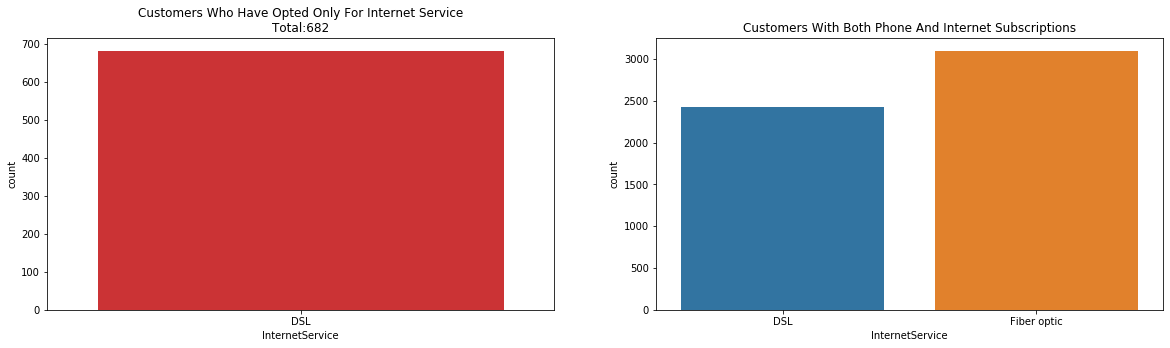

In [119]:
df['MonthlyCharges'].astype('int')
plt.figure(figsize=(20,5))
plt.subplot(121)
plot=sns.countplot(df[df.PhoneService=='No'].InternetService,data=df,palette='Set1')
plt.title("Customers Who Have Opted Only For Internet Service\nTotal:{0}".format(df[df.PhoneService=='No'].customerID.count()))
plt.subplot(122)
plot1=sns.countplot(df[df.InternetService!='No'].InternetService,data=df)
plt.title("Customers With Both Phone And Internet Subscriptions")
plt.show()

Yes    6361
No      682
Name: PhoneService, dtype: int64


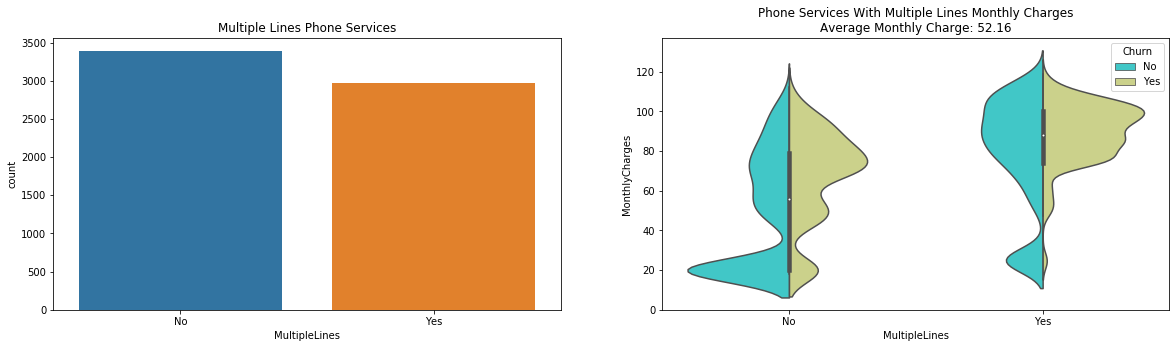

In [9]:
print(df.PhoneService.value_counts())
plt.figure(figsize=(20,5))
plt.subplot(121)
plot=sns.countplot(df[df.PhoneService=='Yes'].MultipleLines,data=df)
plt.title("Multiple Lines Phone Services")
plt.subplot(122)
plot2=sns.violinplot(df[df.MultipleLines!="No phone service"].MultipleLines,df[df.MultipleLines!="No phone service"].MonthlyCharges,hue="Churn",split=True,data=df,palette="rainbow")
plt.title("Phone Services With Multiple Lines Monthly Charges\nAverage Monthly Charge: {0:.2f}".format(df[df.MultipleLines!="Yes"].MonthlyCharges.mean()))
plt.show()

In [22]:
df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


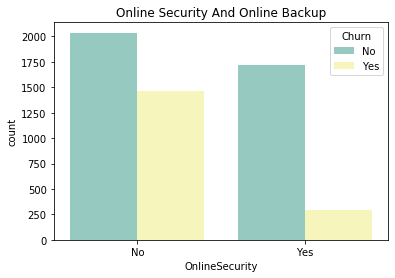

In [21]:
print(df.OnlineSecurity.value_counts())
plot=sns.countplot(df[(df.OnlineSecurity!="No internet service")&(df.OnlineBackup=="No internet service")].OnlineSecurity,hue="Churn",palette="Set3",data=df)
plt.title("Online Security And Online Backup")
plt.show()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


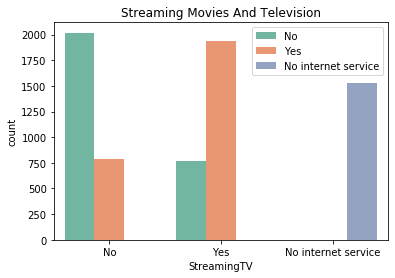

In [11]:
print(df.StreamingTV.value_counts())
plot=sns.countplot("StreamingTV",hue="StreamingMovies",palette="Set2",data=df)
plot.legend(loc=1)
plt.title("Streaming Movies And Television")
plt.show()

Average Monthly Charges:-
Month-to-Month: 66.39849032258066
One Year Contract: 65.04860828241684
Two year: 60.77041297935103


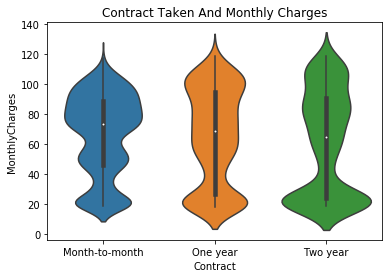

In [12]:
print("Average Monthly Charges:-\nMonth-to-Month: {0}".format(df[df.Contract=='Month-to-month'].MonthlyCharges.mean()))
print("One Year Contract: {0}".format(df[df.Contract=='One year'].MonthlyCharges.mean()))
print("Two year: {0}".format(df[df.Contract=='Two year'].MonthlyCharges.mean()))
df['MonthlyCharges'].astype('int')
plot=sns.violinplot("Contract","MonthlyCharges",data=df)
plt.title("Contract Taken And Monthly Charges")
plt.show()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


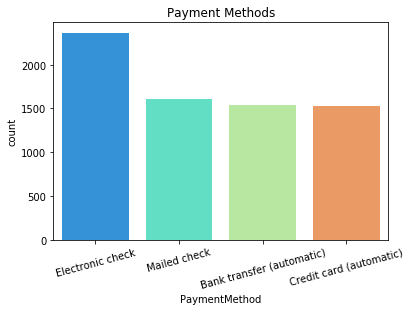

In [13]:
print(df.PaymentMethod.value_counts())
plot=sns.countplot("PaymentMethod",palette="rainbow",data=df)
plt.title("Payment Methods")
plt.xticks(rotation=15)
plt.show()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


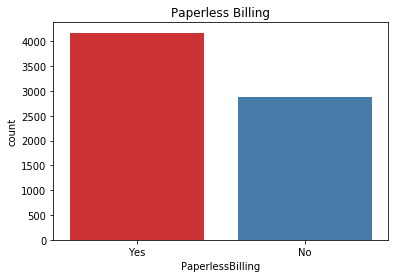

In [14]:
print(df.PaperlessBilling.value_counts())
plot=sns.countplot("PaperlessBilling",palette="Set1",data=df)
plt.title("Paperless Billing")
plt.show()

Average Tenure: 32 months
Mostly seen tenure: 1 month (613 out of 7043 times)


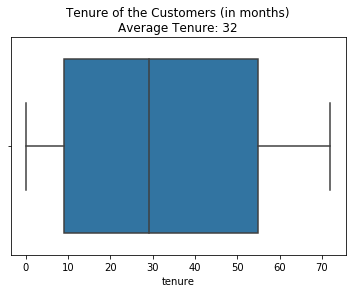

In [15]:
plot=sns.boxplot('tenure',data=df)
print("Average Tenure: {0} months".format(int(df.tenure.mean())))
print("Mostly seen tenure: {0} month ({1} out of {2} times)".format(int(df.tenure.mode()),df[df.tenure==1].tenure.count(),df.tenure.count()))
plt.title("Tenure of the Customers (in months)\nAverage Tenure: {0}".format(int(df.tenure.mean())))
plt.show()